In [ ]:
import tensorflow as tf
import keras
import cv2
import numpy as np
import itertools
import os
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten,Activation,BatchNormalization

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50,VGG16, InceptionResNetV2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.preprocessing import image


In [ ]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img, cmap='gray')

In [ ]:
train_dir = "/content/drive/MyDrive/team_project(DL)/DATA/emotion/train"
test_dir = "/content/drive/MyDrive/team_project(DL)/DATA/emotion/test"

In [ ]:
img_size = 48 #original size of the image

In [ ]:
# 이미지 조회 함수
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img, cmap='gray')

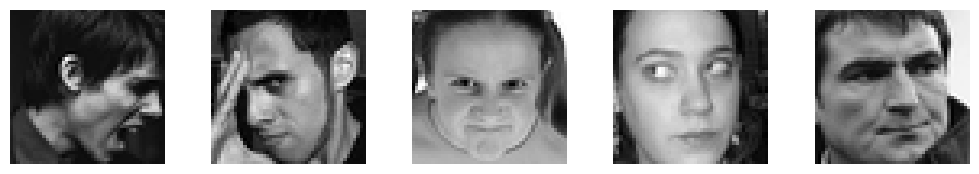

In [ ]:
plot_images(train_dir+'/angry')

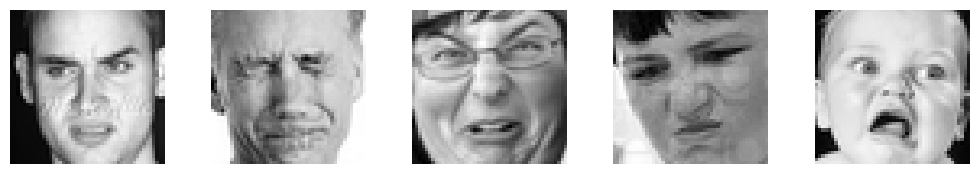

In [ ]:
plot_images(train_dir+'/disgusted')

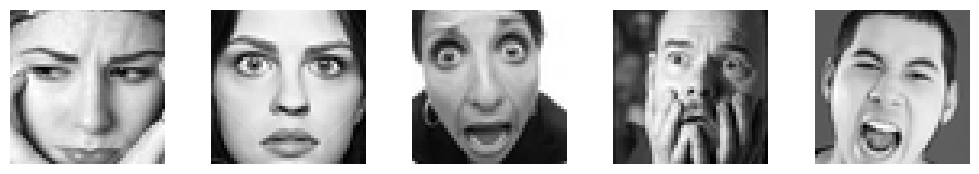

In [ ]:
plot_images(train_dir+'/fearful')

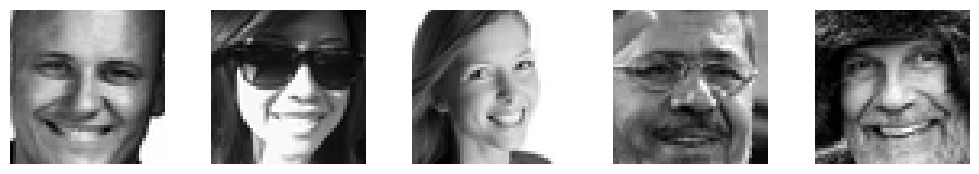

In [ ]:
plot_images(train_dir+'/happy')

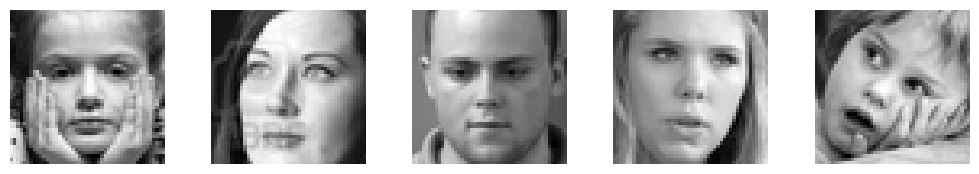

In [ ]:
plot_images(train_dir+'/neutral')

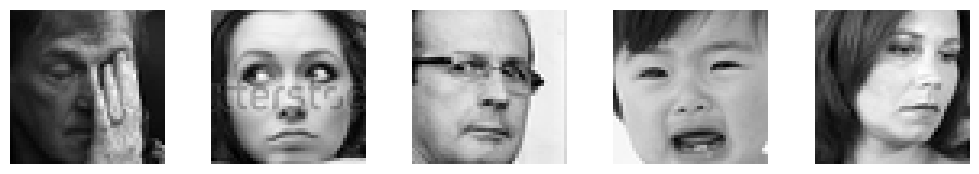

In [ ]:
plot_images(train_dir+'/sad')

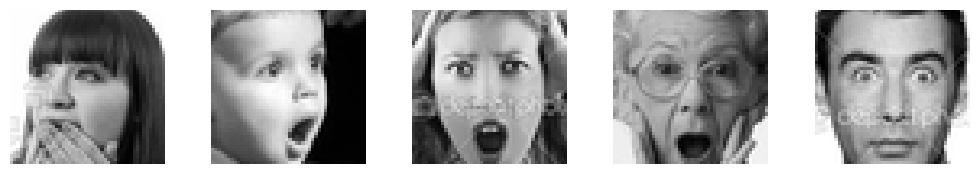

In [ ]:
plot_images(train_dir+'/surprised')

In [ ]:
# 컬럼 분포 조회 함수
def plot_bar_chart_diagram(path_data):
  dic={}
  for emotion in  os.listdir(path_data):
    dem=0
    for x in os.listdir(path_data+"/"+emotion):
      dem+=1
    dic[emotion]=dem
  print(dic)
  barlist=plt.bar(range(len(dic)), list(dic.values()),tick_label=list(dic.keys()))
#set color
  plt.show()

{'angry': 3995, 'disgusted': 436, 'fearful': 4097, 'happy': 7215, 'neutral': 4965, 'sad': 4830, 'surprised': 3171}


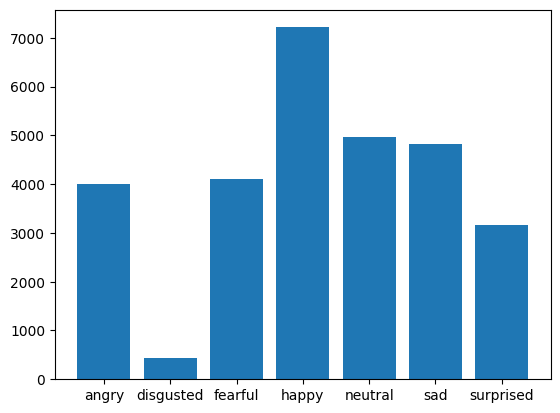

In [ ]:
# TRAIN 이미지 분포 조회
plot_bar_chart_diagram(train_dir)

{'angry': 958, 'disgusted': 111, 'fearful': 1024, 'happy': 1774, 'neutral': 1233, 'sad': 1247, 'surprised': 831}


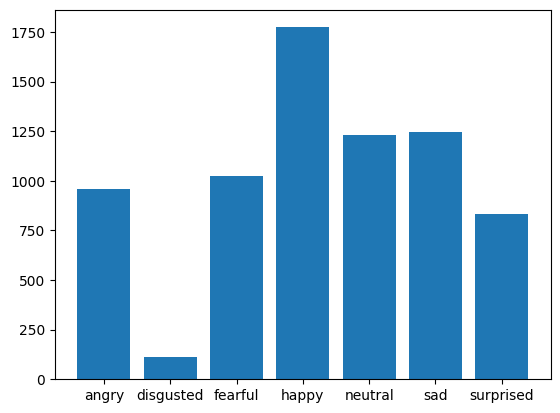

In [ ]:
# TEST 이미지 분포 조회
plot_bar_chart_diagram(test_dir)

In [ ]:
train_data_gen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255
                                         )
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        directory= train_dir,
        target_size=(48, 48),
        batch_size=64,
        class_mode='categorical')

validation_generator = validation_data_gen.flow_from_directory(
        directory= test_dir,
        target_size=(48, 48),
        batch_size=64,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# Model Without Transfer Learning

In [ ]:
# model= tf.keras.models.Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,3)))
# model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(256,activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

# model.add(Dense(512,activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

# model.add(Dense(7, activation='softmax'))

# model.compile(
#     optimizer = Adam(lr=0.0001),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
#   )

In [ ]:
# # Simple early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
# mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator,callbacks=[es, mc])

# Model WIth Transfer Learning(+ 전이학습)


In [ ]:
#using pretrained model, RESNET50 architecture
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(input_shape=(48,48,3),include_top = False, weights = 'imagenet')

base_model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 24, 24, 64)           256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
# kernel_initializer='he_uniform' 가중치 초기화: 신경망 모델의 성능과 수렴 속도에 영향을 미치는 중요한 요소 중 하나
# 특히 깊은 신경망에서는 가중치 초기화가 더욱 중요한데, 이는 네트워크의 깊이에 따라 그래디언트가 소실되거나 폭발할 수 있는 문제를 해결하기 위함
# relu와 함께 사용할 때 효과
emotion_model = Sequential()
emotion_model.add(base_model)
emotion_model.add(Dropout(0.5))
emotion_model.add(Flatten())
emotion_model.add(BatchNormalization())
emotion_model.add(Dense(32,kernel_initializer='he_uniform'))
emotion_model.add(BatchNormalization())
emotion_model.add(Activation('relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(32,kernel_initializer='he_uniform'))
emotion_model.add(BatchNormalization())
emotion_model.add(Activation('relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(32,kernel_initializer='he_uniform'))
emotion_model.add(BatchNormalization())
emotion_model.add(Activation('relu'))
emotion_model.add(Dense(7,activation='softmax'))


emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])


In [ ]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 dropout (Dropout)           (None, 2, 2, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 batch_normalization (Batch  (None, 8192)              32768     
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 32)                262176    
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                       

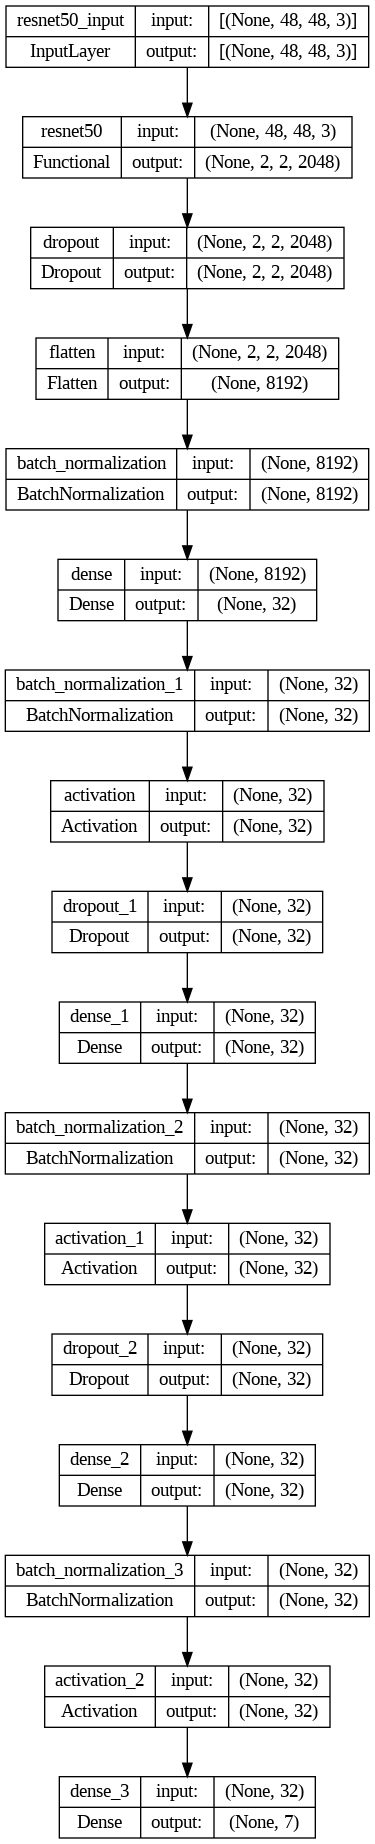

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(emotion_model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

## 3가지 콜백(callback) 설정
####  1. ReduceLROnPlateau:
- monitor = 'val_loss': 검증 손실을 모니터링하여 학습률 조정(조기종료 결정)
- patience = 20: 검증 손실이 개선되지 않는 에포크 수를 지정, 지정된 에포크 수 만큼 동안 검증 손실이 개선되지 않으면 학습률을 감소시킴
- factor = 0.50: 검증 손실이 개선되지 않을 때 학습률을 감소시킬 비율 지정
- min_lr = 1e-10: 학습률의 하한값을 지정, 학습률이 이 값보다 작아지면 더 이상 줄어들지 않음

#### 2. EarlyStopping:
- mode='min': 검증 손실이 최소화되어야 조기 종료됨

#### 3. ModelCheckpoint:
- 'model_resnet.h5': 최적의 모델을 저장할 파일 이름 지정
- monitor='val_accuracy': 검증 정확도를 모니터링하여 가장 높은 정확도를 가진 모델 저장
- mode='max': 검증 정확도가 최대화되어야 모델이 저장
- save_best_only=True: 가장 좋은 모델만 저장하도록 설정. 즉, 검증 정확도가 이전에 저장된 모델보다 높을 경우에만 모델 저장

In [ ]:
# 3가지 콜백(callback) 수행
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,verbose = 1,factor = 0.50, min_lr = 1e-10)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
mc = ModelCheckpoint('model_resnet.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
%%time
history = emotion_model.fit(train_generator,steps_per_epoch=28709 // 64,epochs = 60,validation_data = validation_generator,callbacks=[lrd,es,mc],verbose = 1,validation_steps=7178 // 64)

<timed exec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/60
448/448 [==============================] - ETA: 0s - loss: 2.2162 - accuracy: 0.1300 
Epoch 1: val_accuracy improved from -inf to 0.22182, saving model to model_resnet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


448/448 [==============================] - 8051s 18s/step - loss: 2.2162 - accuracy: 0.1300 - val_loss: 2.2851 - val_accuracy: 0.2218 - lr: 1.0000e-04
Epoch 2/60
448/448 [==============================] - ETA: 0s - loss: 1.9128 - accuracy: 0.2511
Epoch 2: val_accuracy improved from 0.22182 to 0.29018, saving model to model_resnet.h5
448/448 [==============================] - 4577s 10s/step - loss: 1.9128 - accuracy: 0.2511 - val_loss: 1.8364 - val_accuracy: 0.2902 - lr: 1.0000e-04
Epoch 3/60
448/448 [==============================] - ETA: 0s - loss: 1.7390 - accuracy: 0.3233
Epoch 3: val_accuracy improved from 0.29018 to 0.40653, saving model to model_resnet.h5
448/448 [==============================] - 4428s 10s/step - loss: 1.7390 - accuracy: 0.3233 - val_loss: 1.6164 - val_accuracy: 0.4065 - lr: 1.0000e-04
Epoch 4/60
448/448 [==============================] - ETA: 0s - loss: 1.6348 - accuracy: 0.3750
Epoch 4: val_accuracy improved from 0.40653 to 0.47015, saving model to model_resne

# Loading Model to .json file

In [ ]:
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)
emotion_model.save_weights("emotion_model_weights.h5")

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Plotting Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap='viridis'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.style.use('seaborn-darkgrid')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
classes= ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
test_path="../input/emotion-detection-fer/test"
validation_datagen1= ImageDataGenerator(rescale = 1./255)
test1_generator = validation_datagen1.flow_from_directory(directory=test_path, batch_size=64, classes=classes,class_mode="categorical", target_size=(64,64), shuffle=False)
y_true = test1_generator.classes
y_hat =  emotion_model.predict(test1_generator)
y_hat = tf.argmax(y_hat, axis = 1).numpy()


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
accuracy = accuracy_score(y_true, y_hat,)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_true, y_hat,average='micro')
f1 = f1_score(y_true, y_hat,average='micro')
print('F1 score: %f' % f1)

In [ ]:
cm = confusion_matrix(y_true = y_true, y_pred = y_hat)
plot_confusion_matrix(cm, classes, cmap = 'Reds')
plt.savefig('confmat.png')

# test 이미지 예측 테스트

## test1

In [ ]:
test_img = image.load_img('/content/drive/MyDrive/team_project(DL)/DATA/emotion/test/surprised/im101.png',target_size = (48,48))
plt.imshow(test_img)

In [ ]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

test_img = np.expand_dims(test_img,axis = 0)
test_img = test_img.reshape(1,48, 48,3)
result = emotion_model.predict(test_img)
result = list(result[0])

img_index = result.index(max(result))
print(label_dict[img_index])

## test2

In [ ]:
test_img = image.load_img('/content/drive/MyDrive/team_project(DL)/DATA/sad_face_testimg.jpg',target_size = (48,48))
plt.imshow(test_img)

In [ ]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

test_img = np.expand_dims(test_img,axis = 0)
test_img = test_img.reshape(1,48, 48,3)
result = emotion_model.predict(test_img)
result = list(result[0])

img_index = result.index(max(result))
print(label_dict[img_index])